# Exploratory Data Analysis: Air Quality Sensor Data

This notebook analyzes air quality data from various sensors across different cities to understand pollution patterns and their potential health impacts.

## Objectives:
1. Load and explore air quality sensor data
2. Analyze pollutant distributions across cities
3. Identify temporal patterns and trends
4. Correlate air quality with health risk levels
5. Feature engineering for modeling


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import sys

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

print("Libraries imported successfully!")


Libraries imported successfully!


In [ ]:
# Load data
data_dir = Path().absolute().parent / "data" / "raw"
air_quality_file = data_dir / "air_quality_data.csv"

if air_quality_file.exists():
    df = pd.read_csv(air_quality_file, parse_dates=['timestamp'])
    print(f"✓ Loaded {len(df)} records")
else:
    print("Data file not found. Running data collection...")
    sys.path.append(str(Path().absolute().parent / "src"))
    from data_ingestion.collect_data import collect_all_data, load_config
    config = load_config()
    collect_all_data(config)
    df = pd.read_csv(air_quality_file, parse_dates=['timestamp'])
    print(f"✓ Loaded {len(df)} records")

print(f"\nDataset shape: {df.shape}")
print(f"Cities: {df['city'].unique()}")
print(f"Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")


✓ Loaded 150 records

Dataset shape: (150, 11)
Cities: ['New York' 'London' 'Tokyo' 'Delhi' 'Beijing']
Date range: 2025-10-16 17:51:19.751735 to 2025-11-14 17:51:19.765630


In [ ]:
df.head(10)


,city,timestamp,latitude,longitude,pm25,pm10,no2,o3,co,aqi,health_risk_level
0,New York,2025-10-16 17:51:19.751735,40.679514,-73.776003,8.80,18.40,26.82,53.02,0.50,36,good
1,New York,2025-10-17 17:51:19.751748,40.691901,-74.125956,14.06,12.71,27.37,49.00,0.65,54,moderate
2,New York,2025-10-18 17:51:19.751750,40.875531,-74.033105,14.14,16.74,17.67,62.46,0.50,54,moderate
3,New York,2025-10-19 17:51:19.751751,40.700444,-73.931282,11.46,17.72,15.87,42.29,0.51,47,good
4,New York,2025-10-20 17:51:19.751753,40.687723,-73.909767,14.12,18.49,20.90,53.43,0.50,54,moderate
5,New York,2025-10-21 17:51:19.751754,40.733632,-74.071814,11.72,26.21,28.24,47.97,0.55,48,good
6,New York,2025-10-22 17:51:19.751756,40.837891,-73.970621,14.62,18.99,32.63,78.18,0.47,55,moderate
7,New York,2025-10-23 17:51:19.751759,40.581811,-73.982446,15.30,21.63,22.23,53.91,0.61,57,moderate
8,New York,2025-10-24 17:51:19.751762,40.659297,-73.939274,16.00,22.96,27.36,63.29,0.46,58,moderate
9,New York,2025-10-25 17:51:19.751763,40.604529,-74.026657,9.62,14.79,31.65,66.72,0.41,40,good


In [ ]:
# Basic statistics
print("Dataset Info:")
print(df.info())
print("\n" + "="*60)
print("\nBasic Statistics:")
print(df.describe())
print("\n" + "="*60)
print("\nHealth Risk Level Distribution:")
print(df['health_risk_level'].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   city               150 non-null    object        
 1   timestamp          150 non-null    datetime64[ns]
 2   latitude           150 non-null    float64       
 3   longitude          150 non-null    float64       
 4   pm25               150 non-null    float64       
 5   pm10               150 non-null    float64       
 6   no2                150 non-null    float64       
 7   o3                 150 non-null    float64       
 8   co                 150 non-null    float64       
 9   aqi                150 non-null    int64         
 10  health_risk_level  150 non-null    object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 13.0+ KB
None


Basic Statistics:
                           timestamp    latitude   longitud

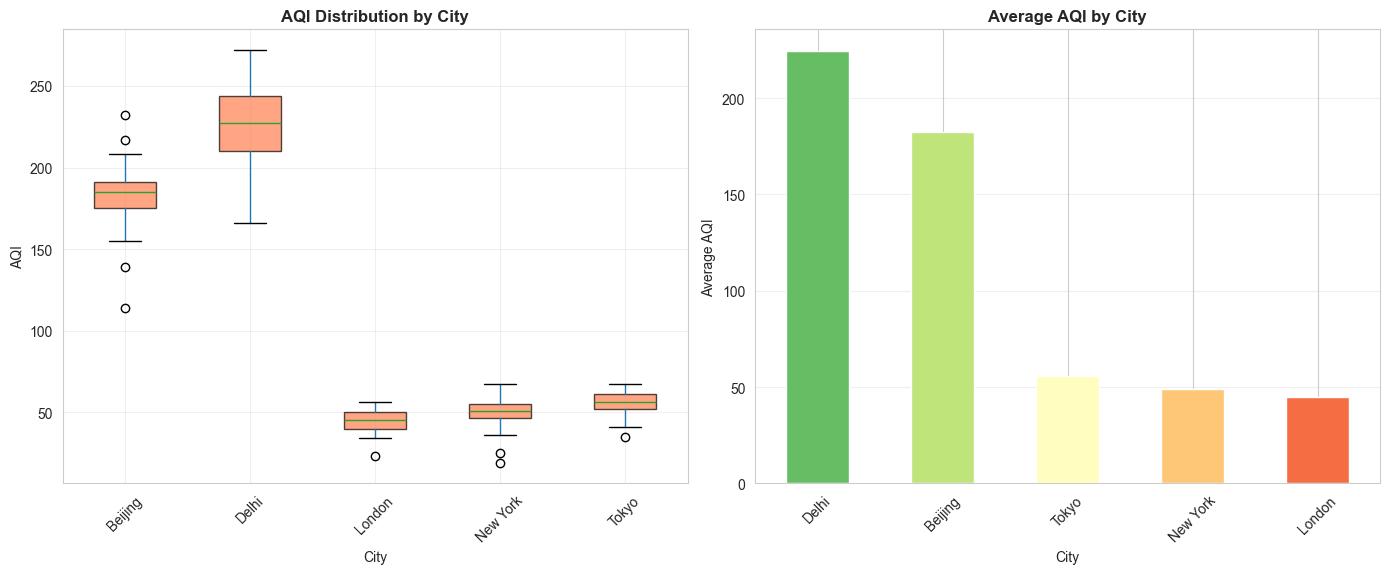

In [ ]:
# AQI distribution by city
plt.figure(figsize=(14, 6))

# Box plot
plt.subplot(1, 2, 1)
df.boxplot(column='aqi', by='city', ax=plt.gca(), patch_artist=True,
           boxprops=dict(facecolor='coral', alpha=0.7))
plt.title('AQI Distribution by City', fontweight='bold')
plt.suptitle('')
plt.xlabel('City')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

# Bar plot - average AQI
plt.subplot(1, 2, 2)
avg_aqi = df.groupby('city')['aqi'].mean().sort_values(ascending=False)
colors_map = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(avg_aqi)))
avg_aqi.plot(kind='bar', color=colors_map)
plt.title('Average AQI by City', fontweight='bold')
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


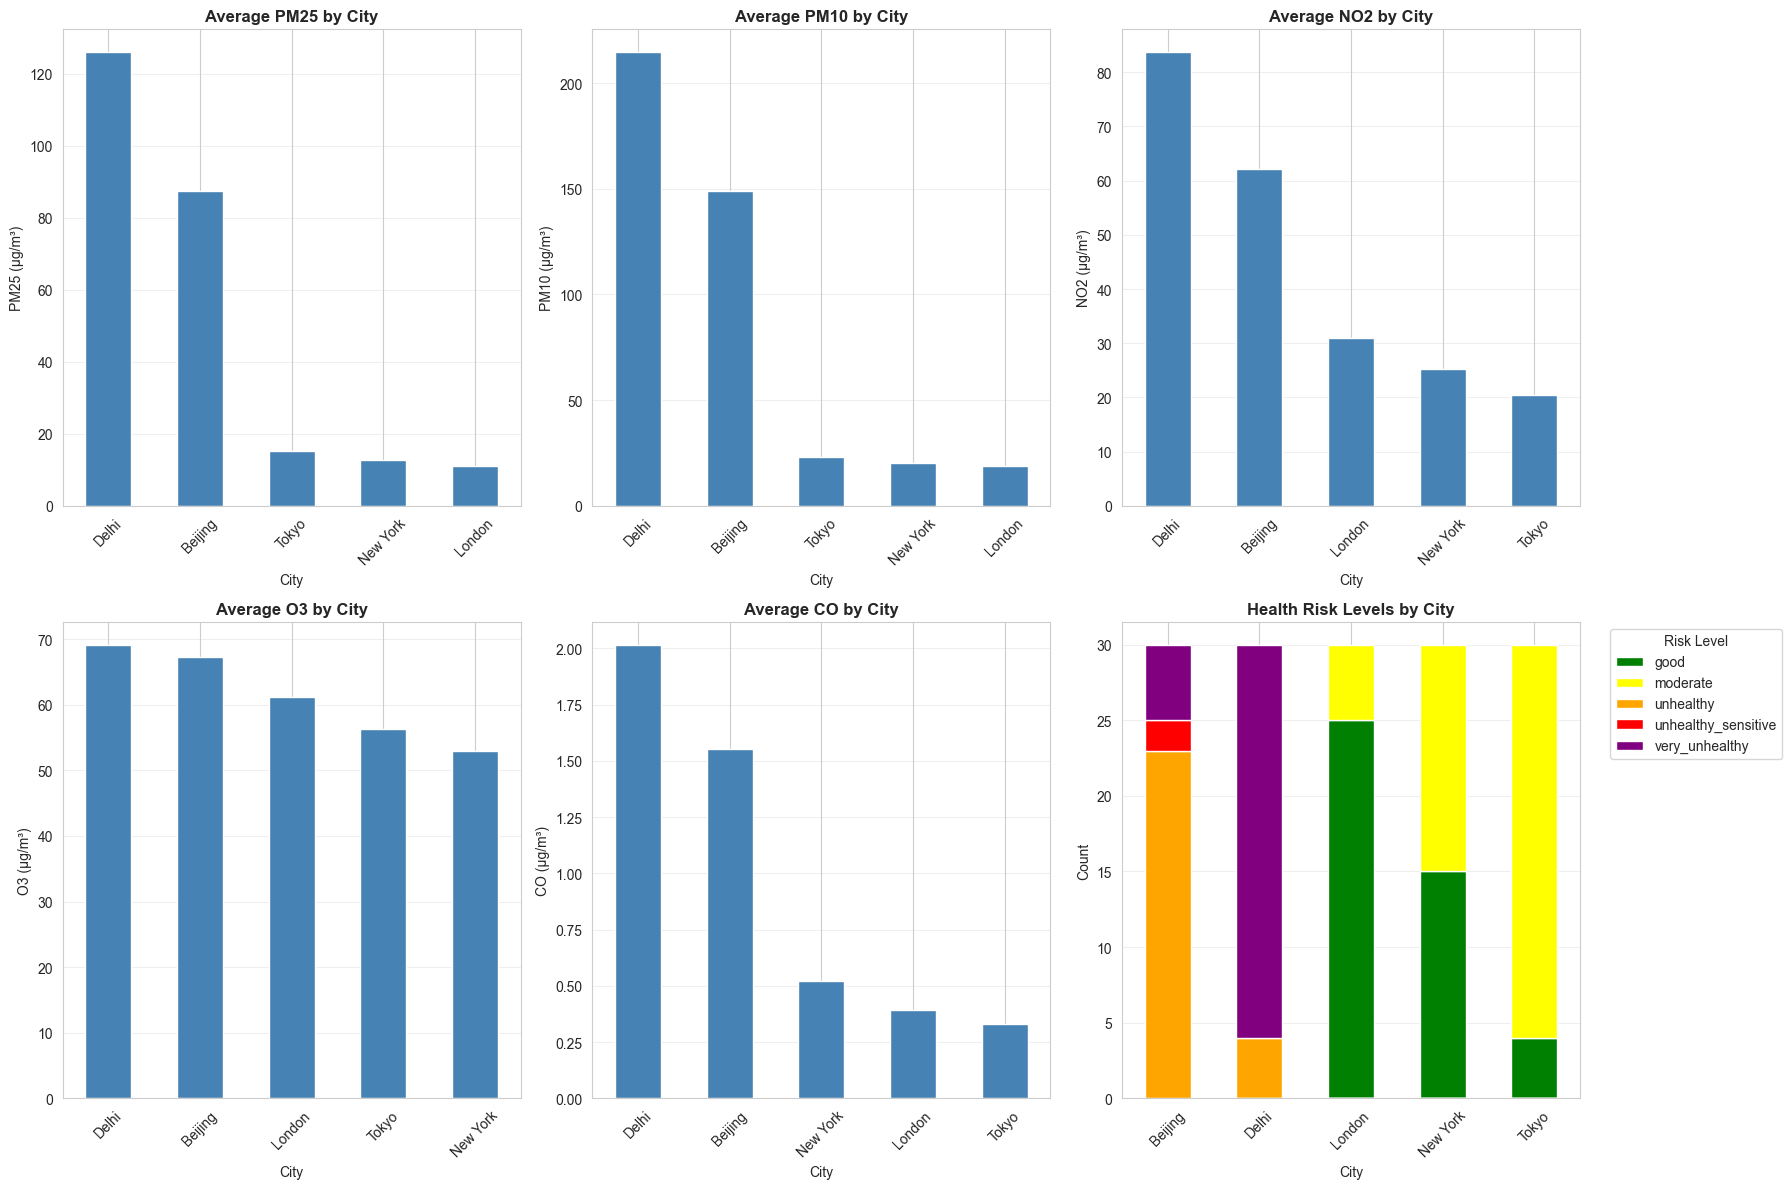

In [ ]:
# Pollutant levels by city
pollutants = [col for col in df.columns if col in ['pm25', 'pm10', 'no2', 'o3', 'co']]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, pollutant in enumerate(pollutants):
    if idx < len(axes):
        ax = axes[idx]
        city_pollutant = df.groupby('city')[pollutant].mean().sort_values(ascending=False)
        city_pollutant.plot(kind='bar', ax=ax, color='steelblue')
        ax.set_title(f'Average {pollutant.upper()} by City', fontweight='bold')
        ax.set_xlabel('City')
        ax.set_ylabel(f'{pollutant.upper()} (μg/m³)')
        ax.tick_params(axis='x', rotation=45)
        ax.grid(axis='y', alpha=0.3)

# Health risk levels
ax = axes[-1]
risk_counts = df.groupby('city')['health_risk_level'].value_counts().unstack(fill_value=0)
risk_counts.plot(kind='bar', ax=ax, stacked=True, 
                 color=['green', 'yellow', 'orange', 'red', 'purple', 'black'])
ax.set_title('Health Risk Levels by City', fontweight='bold')
ax.set_xlabel('City')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Risk Level', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


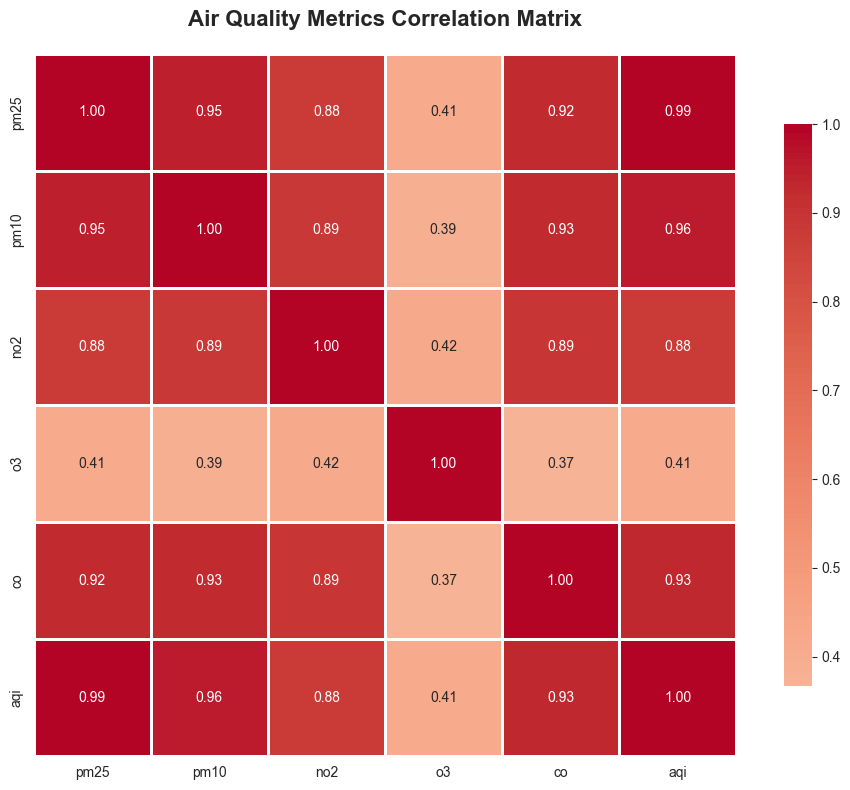

In [ ]:
# Correlation matrix
pollutant_cols = pollutants + ['aqi']
corr_matrix = df[pollutant_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Air Quality Metrics Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


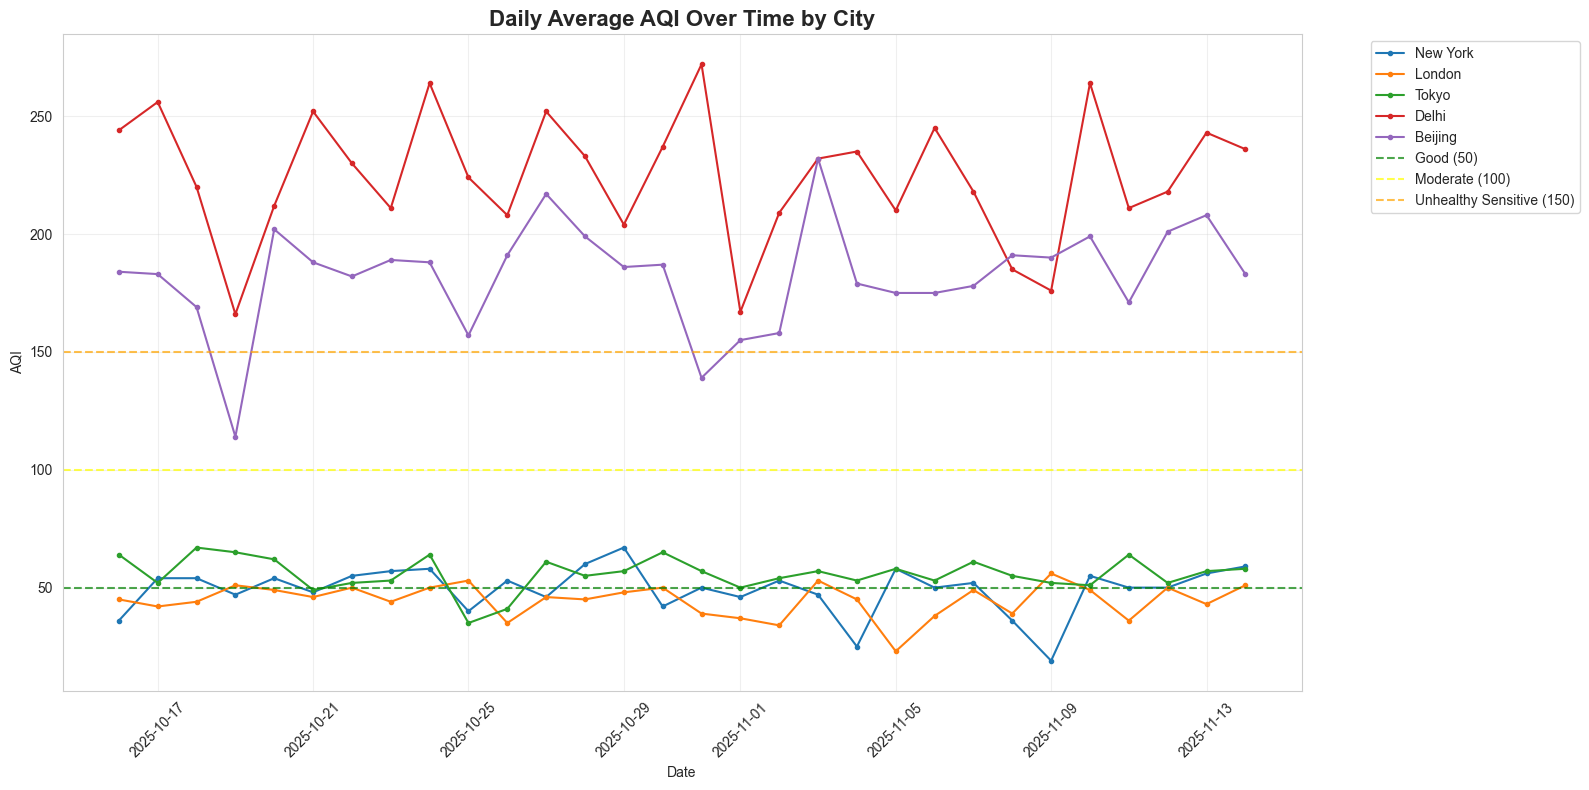

In [ ]:
# Time series analysis
df['date'] = df['timestamp'].dt.date
daily_aqi = df.groupby(['date', 'city'])['aqi'].mean().reset_index()

fig, ax = plt.subplots(figsize=(16, 8))
for city in df['city'].unique():
    city_data = daily_aqi[daily_aqi['city'] == city]
    ax.plot(city_data['date'], city_data['aqi'], label=city, marker='o', markersize=3)

ax.axhline(y=50, color='green', linestyle='--', alpha=0.7, label='Good (50)')
ax.axhline(y=100, color='yellow', linestyle='--', alpha=0.7, label='Moderate (100)')
ax.axhline(y=150, color='orange', linestyle='--', alpha=0.7, label='Unhealthy Sensitive (150)')

ax.set_title('Daily Average AQI Over Time by City', fontsize=16, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


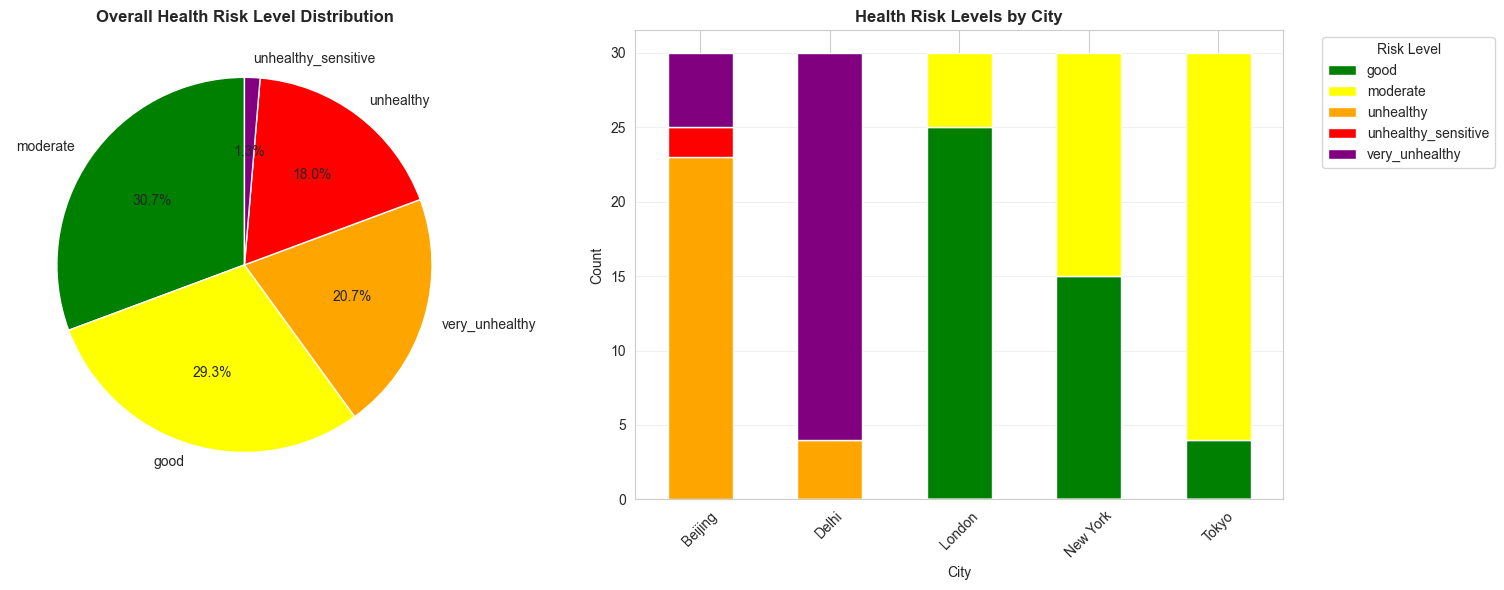

In [ ]:
# Health risk level distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Overall distribution
axes[0].pie(df['health_risk_level'].value_counts(), 
            labels=df['health_risk_level'].value_counts().index,
            autopct='%1.1f%%', startangle=90,
            colors=['green', 'yellow', 'orange', 'red', 'purple', 'black'])
axes[0].set_title('Overall Health Risk Level Distribution', fontweight='bold')

# By city
risk_by_city = pd.crosstab(df['city'], df['health_risk_level'])
risk_by_city.plot(kind='bar', stacked=True, ax=axes[1],
                  color=['green', 'yellow', 'orange', 'red', 'purple', 'black'])
axes[1].set_title('Health Risk Levels by City', fontweight='bold')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Risk Level', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()
